## test11.ipynb

Test bed for delta units and delta synapses.

This script is based on step1.ipynb part 3, but in here all the units in L are replaced for a single delta unit.
Moreover, layers `upd` and `des` were added, each with a single unit that provide the update signal and the desired value respectively.

In [1]:
# import the ei_network class and draculab
%cd ..
from ei_network import *

/home/z/projects/draculab


In [2]:
# create the network using the ei_network tools
layers = ['L', 'upd', 'des']  # L is the layer, upd is the update signal, des is the desired output
net = ei_network(layers)

In [3]:
# Configure layer parameters
L = net.layers['L']
upd = net.layers['upd']
des = net.layers['des']
#----------------------------------
L.set_param('e_pars', 'type', unit_types.delta_linear)
L.set_param('e_pars', 'slope_min', 6.)
L.set_param('e_pars', 'slope_wid', .1)
L.set_param('e_pars', 'thresh_min', .3)
L.set_param('e_pars', 'thresh_wid', 0.1)
L.set_param('e_pars', 'n_ports', 3)
L.set_param('e_pars', 'branch_params', {'branch_w' : [0.5, 0.5], 'slopes' : 4, 'threshs' : 0.1})
L.set_param('e_pars', 'tau_slow', 10.)
L.set_param('e_pars', 'tau_fast', 0.02)
L.set_param('e_pars', 'gain', 1.)
L.set_param('e_pars', 'tau_e', .7) # gives roughly 0.5 seconds
L.set_param('e_pars', 'bias_lrate', .0002)
#----------------------------------
L.annotate("Adjusting size of e,i groups.")
L.set_param('e_geom', 'rows', 1)
L.set_param('e_geom', 'columns', 1)
L.set_param('i_geom', 'rows', 0)
L.set_param('ee_conn', 'weights',{'uniform' : {'low': 0., 'high' : 0.}})
#----------------------------------
L.annotate("Setting input parameters")
L.set_param('x_geom', 'rows', 5) 
L.set_param('x_geom', 'columns', 5) 
L.set_param('xe_conn', 'weights', {'uniform' : {'low': 0.05, 'high' : 1.}})
L.set_param('xe_conn', 'mask', {'circular': {'radius': 10.}})
#-----------------------------------
# specifying input ports
L.set_param('xe_syn', 'inp_ports', 0)
#----------------------------------
L.annotate("Using delta input synapses")
L.set_param('xe_syn', 'type', synapse_types.delta)
L.set_param('xe_syn', 'lrate', 1.)
#----------------------------------
upd.annotate("Leaving a single input unit in the upd layer")
upd.set_param('e_geom', 'rows', 0)
upd.set_param('i_geom', 'rows', 0)
upd.set_param('x_geom', 'rows', 1)
upd.set_param('x_geom', 'columns', 1)
#----------------------------------
upd.annotate("Configuring upd unit")
upd.set_param('x_pars', 'function', lambda x : None)
upd.set_param('x_pars', 'init_val', 1.)
upd.set_param('x_pars', 'coordinates', np.array([0.,0.]))
#----------------------------------
L.set_param('n', 'w_track', 16)
upd.set_param('n', 'w_track', 0)
des.set_param('n', 'w_track', 0)
#----------------------------------
des.annotate("Leaving a single input unit in the des layer")
des.set_param('e_geom', 'rows', 0)
des.set_param('i_geom', 'rows', 0)
des.set_param('x_geom', 'rows', 1)
des.set_param('x_geom', 'columns', 1)
#----------------------------------
des.annotate("Configuring des unit")
des.set_param('x_pars', 'function', lambda x : None)
des.set_param('x_pars', 'init_val', 1.)
des.set_param('x_pars', 'coordinates', np.array([0.,0.]))
des.set_param('x_pars', 'tau_slow', 5.)

In [4]:
# Add interlayer connections
net.add_connection(('upd','x'), ('L','e'))
net.add_connection(('des','x'), ('L','e'))

In [8]:
n, r = divmod(16,1)
r

0

In [5]:
# Configure interlayer connections
net.set_param('updx_Le_conn', 'mask',{'circular': {'radius': 10.}})
net.set_param('updx_Le_conn', 'kernel', 1.)
net.set_param('updx_Le_conn', 'weights', {'uniform' : {'low': 1., 'high': 1.}})
net.set_param('updx_Le_syn', 'inp_ports', 2)
net.set_param('desx_Le_conn', 'mask',{'circular': {'radius': 10.}})
net.set_param('desx_Le_conn', 'kernel', 1.)
net.set_param('desx_Le_conn', 'weights', {'uniform' : {'low': 1., 'high': 1.}})
net.set_param('desx_Le_syn', 'inp_ports', 1)

In [6]:
# Build the network
net.build()

Building layer L
4
4
16
[0 0 0]
4
4
16
[0 0 0]
4
4
16
[0 0 0]
Building layer upd
Building layer des


Creating updx_Le connection
Creating desx_Le connection


/home/z/projects/draculab/topology.py:286: UserWarning: topo_connect received an empty list as an argument
  warn('topo_connect received an empty list as an argument', UserWarning)


In [7]:
# Creating input patterns
## The patterns of L.x
n_pat = 4  # number of input patterns
pat_arr = np.zeros((4, 25)) # array with all input patterns

for row in range(5):
    for col in range(5):
        idx = 5*col + row
        if row == col or row+col == 4: # The X input pattern
            pat_arr[0,idx] = 1
        if row == 2 or col == 2:  # The + input pattern
            pat_arr[1,idx] = 1
        if row == 1 or row == 3:  # The = input pattern
            pat_arr[2,idx] = 1
        if col == 1 or col == 3:  # The || input pattern
            pat_arr[3,idx] = 1
pat_arr = pat_arr / 5.

def inp_pat(pres, rows, columns, port=0, random=False):
    # The function that creates the input pattern shown at each presentation in net.run
    if random:
        idx = np.random.randint(4)
    else:
        idx = pres % 4
    return pat_arr[idx, :]

upd_inp_pat = lambda p, r, c : 1.

def make_upd_fun(prev_pat, cur_pat, init_time, pres_time, inp_units):
    eps = .5 # update is started eps units before the next input
    return lambda t : 1. if (t > init_time+pres_time-eps and t < init_time+pres_time-eps/2.) else 0.
    #return lambda t: 1.  # constantly updating unit

def set_upd_fun(pre_inp, cur_inp, init_time, pres_time, inp_units):
    for unit in inp_units:
            unit.set_function( make_upd_fun(pre_inp, cur_inp, init_time, pres_time, inp_units) )

def des_pat(pres, rows, columns):
    # assuming random=False in inp_pat, this will produce a desired output of
    # 0.1 for the X pattern
    # 0.35 for the + pattern
    # 0.6 for the = pattern
    # 0.85 for the || pattern
    return np.array([(pres % 4) * .25 + 0.1])
            
            
inp_pat_dic = {'L' : inp_pat, 'upd' : upd_inp_pat, 'des' : des_pat }
inp_fun_dic = {'upd' : set_upd_fun }

In [8]:
# add tracking units for the learning and error variables
trk_pars = {'type' : unit_types.source,  # parameters for "tracking" units
            'init_val' : 0.,
            'tau_fast' : 0.05,
            'function' : lambda x: None }
def create_lt(unit_id):
    return lambda t : net.net.units[unit_id].learning

def create_et(unit_id):
    return lambda t : net.net.units[unit_id].error

learn_trk = net.net.create(1, trk_pars)
error_trk = net.net.create(1, trk_pars)
net.net.units[learn_trk[0]].set_function(create_lt(L.e[0]))
net.net.units[error_trk[0]].set_function(create_et(L.e[0]))

In [9]:
# Simulating
n_pres = 50
pres_time = 1.5

#net.run(n_pres, pres_time, set_inp_pat=inp_pat_dic, set_inp_fun=inp_fun_dic)

import cProfile
import pstats
cProfile.run('net.run(n_pres, pres_time, set_inp_pat=inp_pat_dic, set_inp_fun=inp_fun_dic)', 'restats')
prof = pstats.Stats('restats')
prof.sort_stats('cumulative').print_stats(30)


Starting presentation 0
Presentation 0 took 0.40578126907348633 seconds 
Starting presentation 1
Presentation 1 took 0.412153959274292 seconds 
Starting presentation 2
Presentation 2 took 0.3998899459838867 seconds 
Starting presentation 3
Presentation 3 took 0.39985013008117676 seconds 
Starting presentation 4
Presentation 4 took 0.40140867233276367 seconds 
Starting presentation 5
Presentation 5 took 0.39600062370300293 seconds 
Starting presentation 6
Presentation 6 took 0.4031946659088135 seconds 
Starting presentation 7
Presentation 7 took 0.39783334732055664 seconds 
Starting presentation 8
Presentation 8 took 0.3922848701477051 seconds 
Starting presentation 9
Presentation 9 took 0.39478540420532227 seconds 
Starting presentation 10
Presentation 10 took 0.4018878936767578 seconds 
Starting presentation 11
Presentation 11 took 0.397921085357666 seconds 
Starting presentation 12
Presentation 12 took 0.3917837142944336 seconds 
Starting presentation 13
Presentation 13 took 0.398828

Tue Jul 31 13:52:40 2018    restats

         21640874 function calls (21220874 primitive calls) in 18.112 seconds

   Ordered by: cumulative time
   List reduced from 95 to 30 due to restriction <30>

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000   18.112   18.112 {built-in method builtins.exec}
        1    0.000    0.000   18.112   18.112 <string>:1(<module>)
        1    0.001    0.001   18.112   18.112 /home/z/projects/draculab/ei_network.py:359(run)
       50    0.387    0.008   18.078    0.362 /home/z/projects/draculab/network.py:675(run)
    15000    0.215    0.000   10.040    0.001 /home/z/projects/draculab/units.py:210(update)
    15000    0.031    0.000    8.681    0.001 /home/z/.local/lib/python3.5/site-packages/scipy/integrate/odepack.py:25(odeint)
    15000    0.171    0.000    8.579    0.001 {built-in method scipy.integrate._odepack.odeint}
   107702    0.089    0.000    8.408    0.000 /home/z/projects/draculab/units.py:4398(derivatives)
   107702    0.216    0.000    8.319    0.000 /home/z/projects/draculab/units.py:4390(get_mp_input_sum)
  3462449    2.762    0.000    7.895    0.000 /home/z/projects/draculab/ei_network.py:344(<lambda>)
   107702    0.817    0.000    7.160    0.000 /home/z/projects/draculab/units.py:4392(<listcomp>)
   420000    0.192    0.000    7.085    0.000 /home/z/projects/draculab/units.py:567(<lambda>)
   420000    0.164    0.000    6.893    0.000 /home/z/projects/draculab/units.py:567(<listcomp>)
   675000    0.201    0.000    6.889    0.000 /home/z/projects/draculab/units.py:2122(update)
   375000    0.653    0.000    6.339    0.000 /home/z/projects/draculab/units.py:2134(upd_lpf_fast)
840000/420000    3.964    0.000    5.472    0.000 /home/z/.local/lib/python3.5/site-packages/numpy/core/numeric.py:1343(roll)
  6924898    5.133    0.000    5.133    0.000 /home/z/projects/draculab/ei_network.py:332(H)
   420000    0.470    0.000    0.708    0.000 /home/z/.local/lib/python3.5/site-packages/numpy/core/numeric.py:1489(normalize_axis_tuple)
   840101    0.275    0.000    0.340    0.000 /home/z/.local/lib/python3.5/site-packages/numpy/core/numeric.py:534(asanyarray)
   107702    0.280    0.000    0.280    0.000 /home/z/projects/draculab/units.py:4393(<listcomp>)
    15000    0.035    0.000    0.270    0.000 /home/z/projects/draculab/units.py:571(upd_lpf_fast)
   107702    0.269    0.000    0.269    0.000 /home/z/projects/draculab/units.py:4395(<listcomp>)
   107702    0.259    0.000    0.259    0.000 /home/z/projects/draculab/units.py:4394(<listcomp>)
   375000    0.174    0.000    0.229    0.000 /home/z/projects/draculab/synapses.py:870(update)
   840000    0.147    0.000    0.214    0.000 /home/z/.local/lib/python3.5/site-packages/numpy/core/numeric.py:1536(<genexpr>)
   420001    0.155    0.000    0.155    0.000 {method 'reshape' of 'numpy.ndarray' objects}
   122702    0.142    0.000    0.142    0.000 {built-in method builtins.sum}
    15000    0.066    0.000    0.120    0.000 /home/z/projects/draculab/units.py:975(upd_error)
   122702    0.060    0.000    0.120    0.000 /home/z/projects/draculab/units.py:242(get_act)
   420000    0.102    0.000    0.102    0.000 {built-in method numpy.core.multiarray.empty_like}


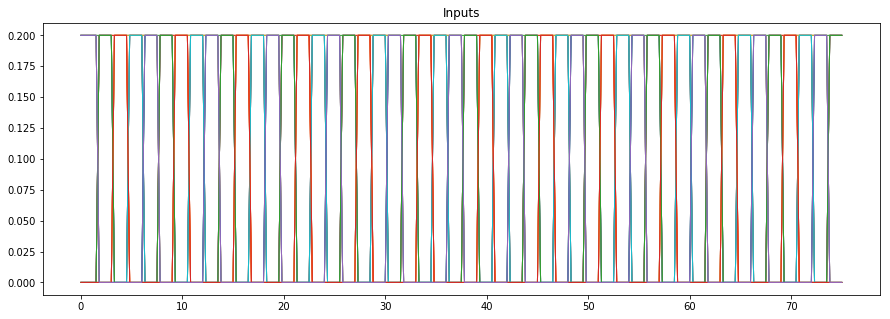

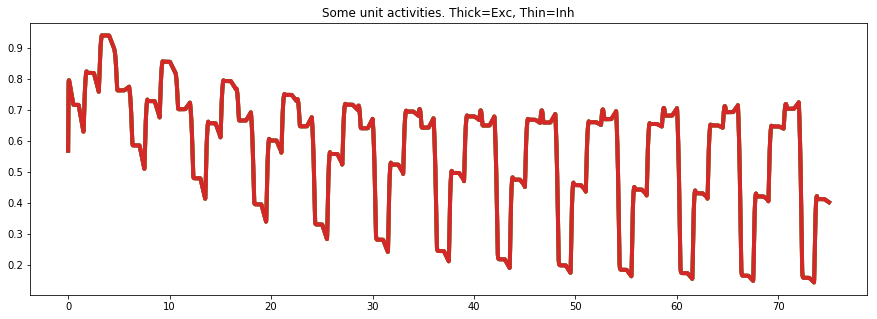

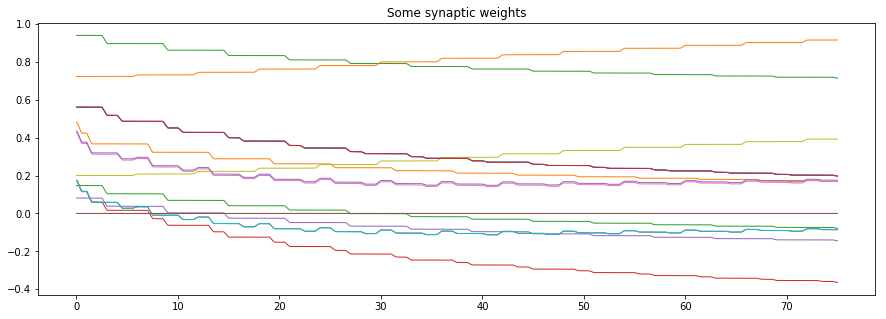

In [16]:
%matplotlib inline
net.basic_plot('L')

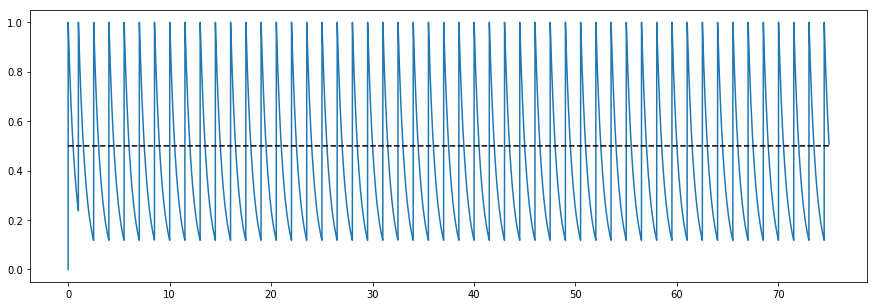

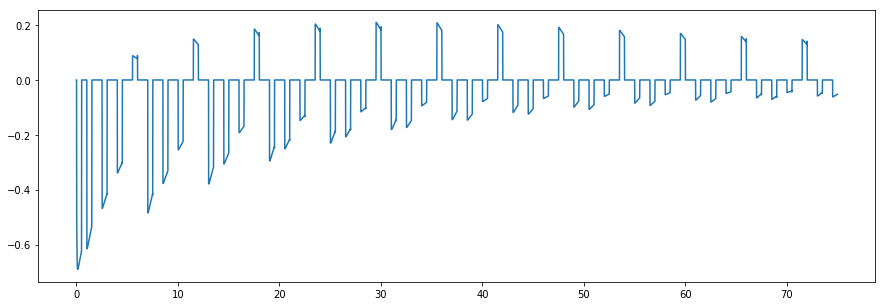

In [18]:
# plot learning and error variables
tr_fig = plt.figure(figsize=(15,5))
plt.plot(net.all_times, net.all_activs[learn_trk[0]], net.all_times, np.tile(.5,len(net.all_times)), 'k--')
err_fig = plt.figure(figsize=(15,5))
#plt.plot(net.all_times[32000:], net.all_activs[error_trk[0]][32000:])
plt.plot(net.all_times, net.all_activs[error_trk[0]])

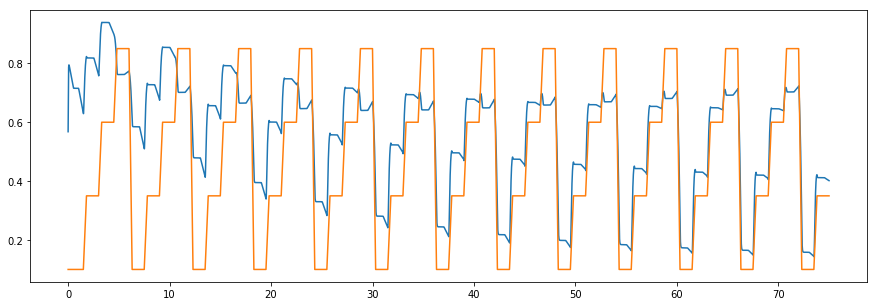

In [19]:
# compare actual and desired outputs
cmp_fig = plt.figure(figsize=(15,5))
#plt.plot(net.all_times[32000:], net.all_activs[L.e[0]][32000:], net.all_times[32000:], net.all_activs[des.x[0]][32000:])#
plt.plot(net.all_times, net.all_activs[L.e[0]], net.all_times, net.all_activs[des.x[0]])

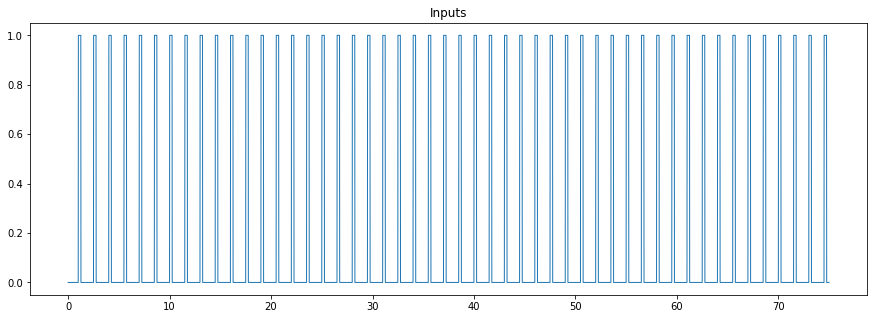

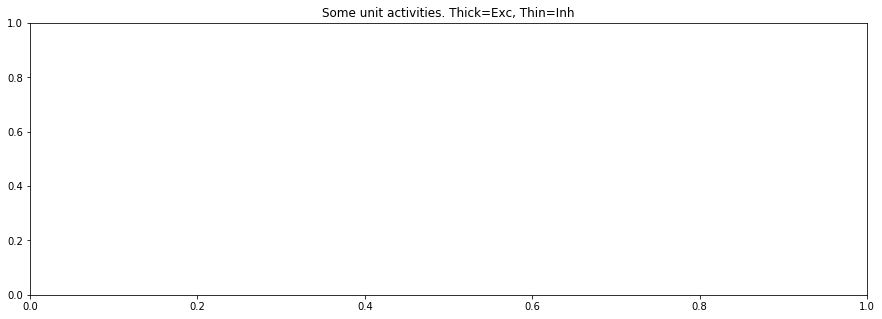

In [14]:
%matplotlib inline
net.basic_plot('upd')

In [20]:
net.net.units[L.e[0]].bias

-0.24533588607867329